# **Graficar con Pandas**
---

* **Pie chart:** Gráfica circular estadística, dividida en segmentos, para ilustrar proporciones.
* **Box plot:** Muestra 5 valores: Mínimo, primer cuartil, mediana, último cuartil, máixmo y outliers.
* **Scatter plot** 



In [1]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd
import numpy as np

%matplotlib inline


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [6]:
df.set_index("Country", inplace=True)

In [7]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [8]:
print("Data dimensions: ", df.shape )

Data dimensions:  (195, 38)


In [12]:
years = list(map(str, range(1980, 2014)))

In [11]:
years2 = np.arange(180, 2014).astype(str)

# **Pie chart**
---

Pasos: 
1. **Split**: Separar los datos en grupos con base en algún criterio.
2. **Apply**: Aplicar una función a cada grupo independientemente: `.sum() .count() .std() .aggregate() .apply()...`
3. **Combine**: Combinar los resultados en una estructura de datos.

In [14]:
df_continents = df.groupby("Continent").sum()

df_continents.head()

,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


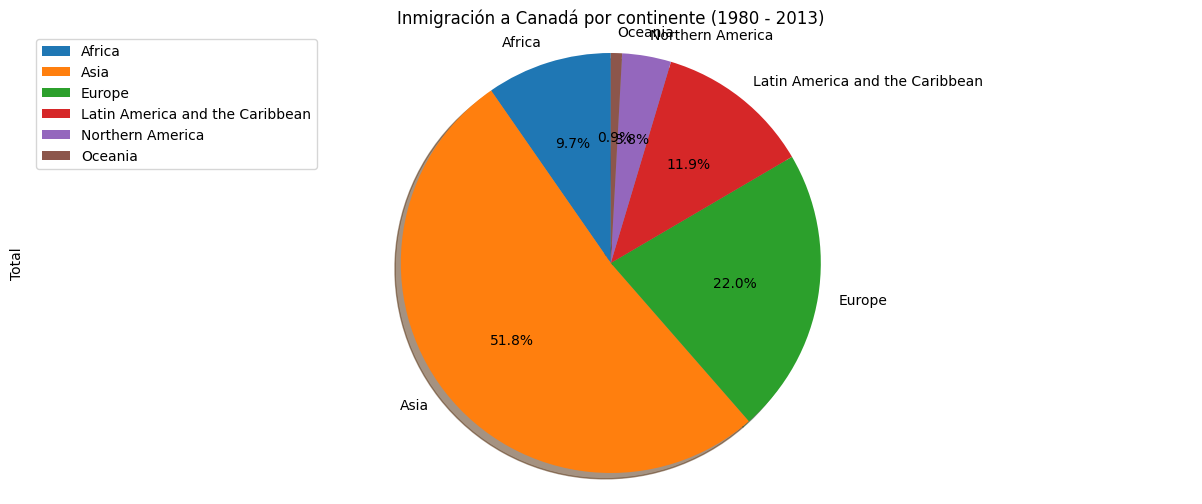

In [28]:
df_continents["Total"].plot(kind="pie",
                           figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True)

plt.title("Inmigración a Canadá por continente (1980 - 2013)")
plt.axis("equal") # Para que parezca un círculo
plt.legend(labels=df_continents.index, loc="upper left")

plt.show()

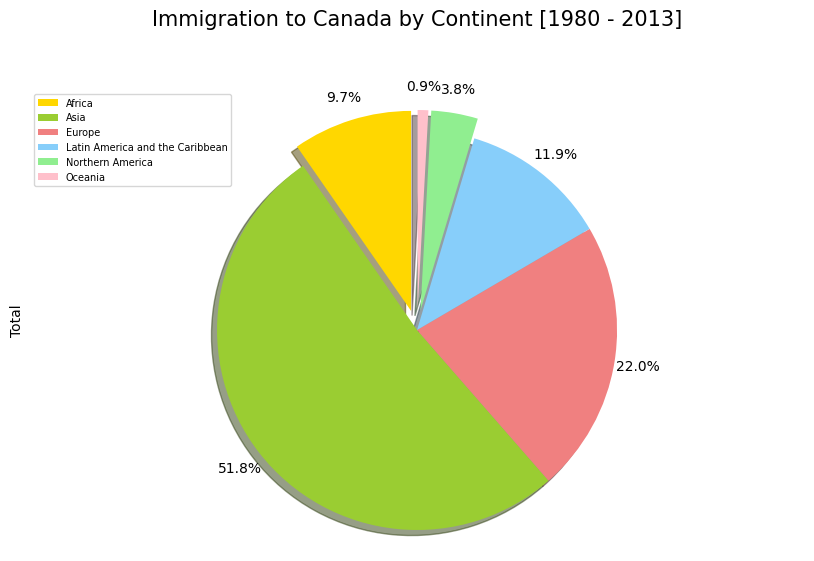

In [33]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 

plt.show()

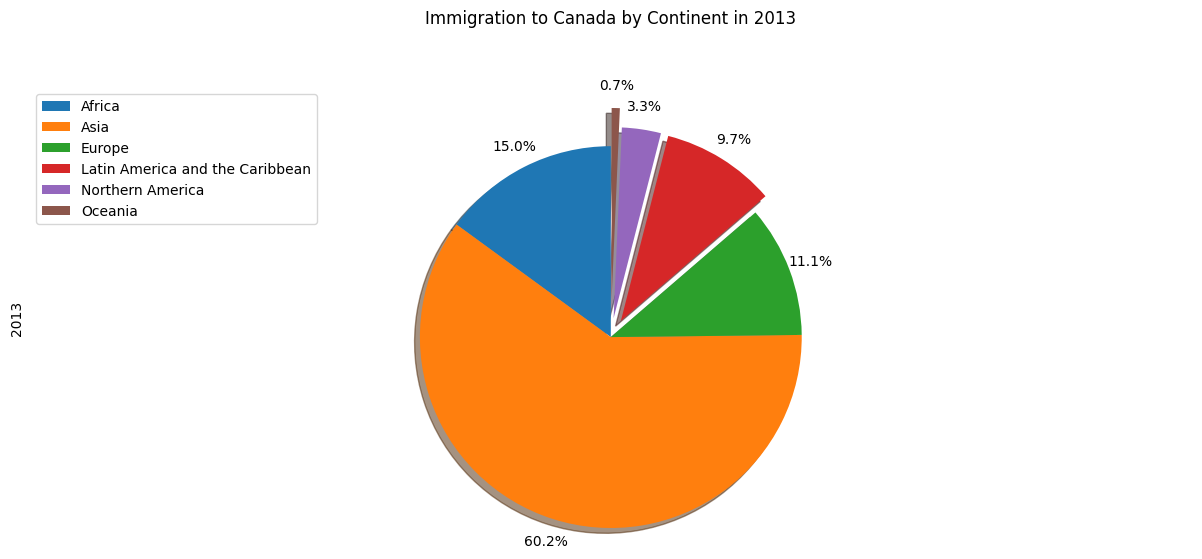

In [35]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# show plot
plt.show()

# **Box plots**
---

Es una forma estadística de representar la distribución de los datos a partir de 5 dimensiones:
* **Mínimo**: El valor mínimo del dataset excluyendo las anoamlías.
* **Primer cuartil**: valor medio entre `mínimo`y `media`.
* **Segundo cuartil (Media)**
* **Tercer cuartil:** valor emdio entre `media` y `máximo`.
* **Máximo**: El valor más grande del dataset excluyendo anomalías. 

In [37]:
df_japan = df.loc[["Japan"], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


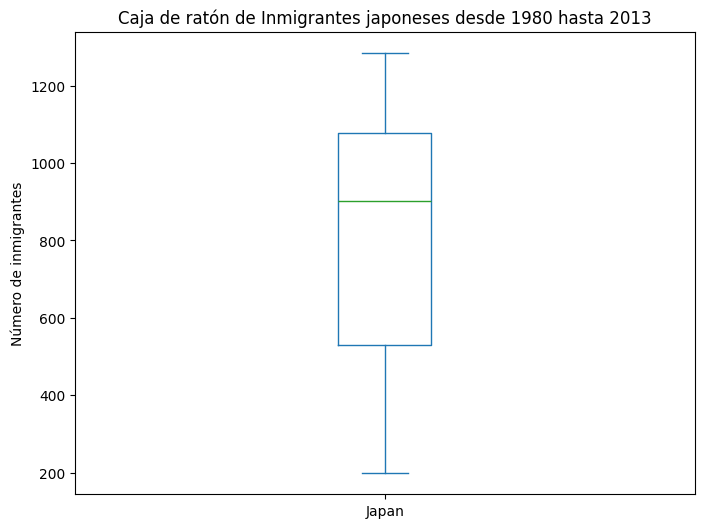

In [39]:
df_japan.plot(kind="box", figsize=(8,6))

plt.title("Caja de ratón de Inmigrantes japoneses desde 1980 hasta 2013")
plt.ylabel("Número de inmigrantes")

plt.show()

In [40]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [42]:
df_india_china =  df.loc[["India", "China"], years].transpose()
df_india_china.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


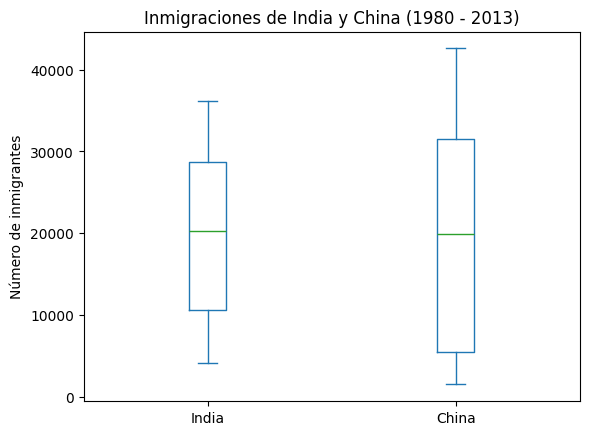

In [44]:
df_india_china.plot(kind="box")

plt.title("Inmigraciones de India y China (1980 - 2013)")
plt.ylabel("Número de inmigrantes")

plt.show()

In [46]:
df_india_china.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


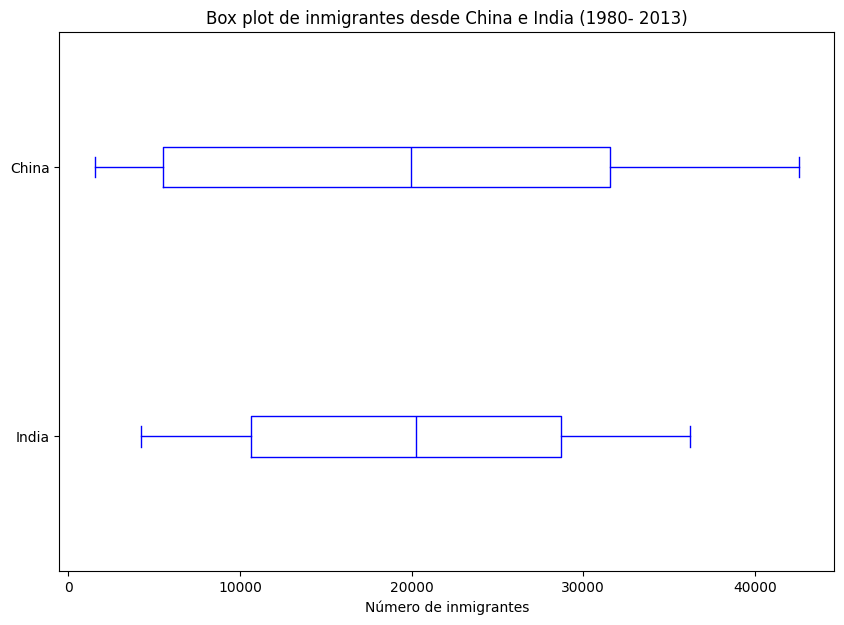

In [48]:
df_india_china.plot(kind="box", figsize=(10,7), color="blue", vert=False)

plt.title("Box plot de inmigrantes desde China e India (1980- 2013)")
plt.xlabel("Número de inmigrantes")

plt.show()

## **Subplots**
----

**Convenio**

Si el número de filas, columnas y gráficas son todas menores a 10, existe el siguinete convenio:

`subplot(211) == subplot(2,1,1)`

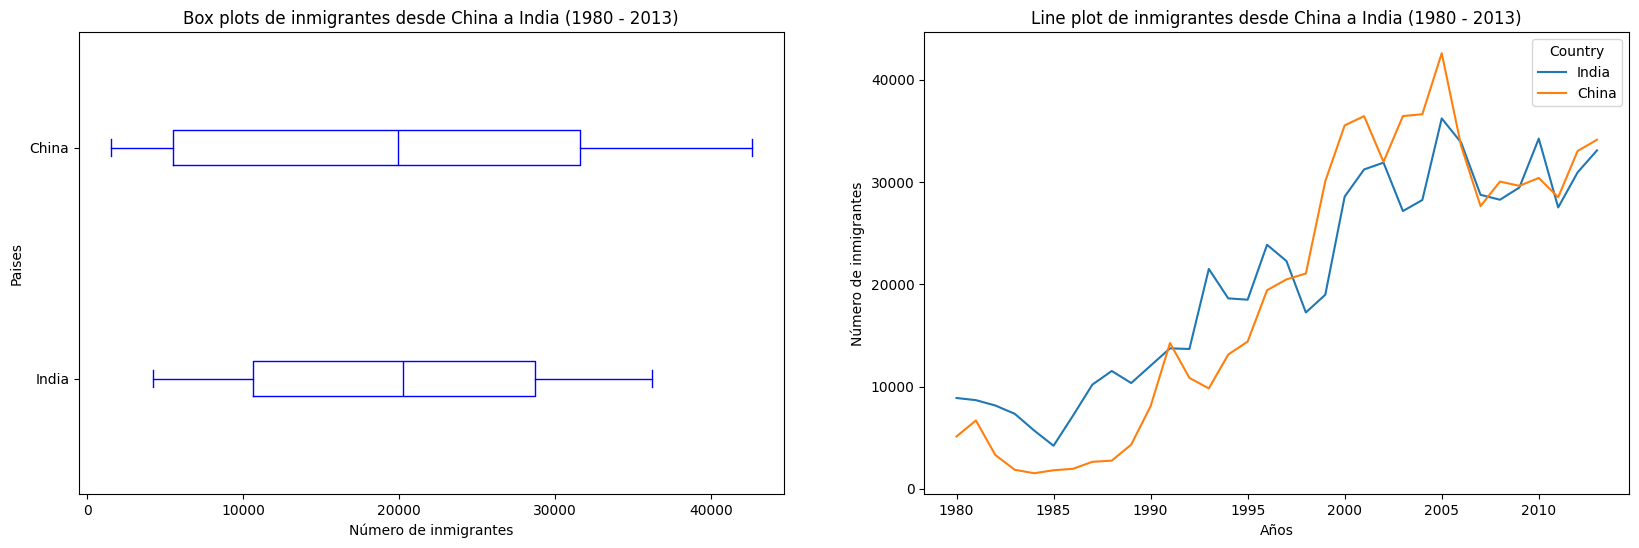

In [52]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_india_china.plot(kind="box", color="blue", vert=False, figsize=(20,6), ax=ax0)
ax0.set_title("Box plots de inmigrantes desde China a India (1980 - 2013)")
ax0.set_xlabel("Número de inmigrantes")
ax0.set_ylabel("Paises")

df_india_china.plot(kind="line", figsize=(20,6), ax=ax1)
ax1.set_title("Line plot de inmigrantes desde China a India (1980 - 2013)")
ax1.set_ylabel("Número de inmigrantes")
ax1.set_xlabel("Años")

plt.show()

In [53]:
df_top15 = df.sort_values(by="Total", ascending=False, axis=0).head(15)
df_top15.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [57]:
y_80s = list(map(str, range(1980, 1990)))
y_90s = list(map(str, range(1990, 2000)))
y_00s = list(map(str, range(2000, 2010)))

df_80s = df_top15.loc[:, y_80s].sum(axis=1)
df_90s = df_top15.loc[:, y_90s].sum(axis=1)
df_00s = df_top15.loc[:, y_00s].sum(axis=1)


new_df = pd.DataFrame({"1980s": df_80s, "1990s": df_90s, "2000s": df_00s})

new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [58]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


Text(0, 0.5, 'Cantidad de inmigrantes')

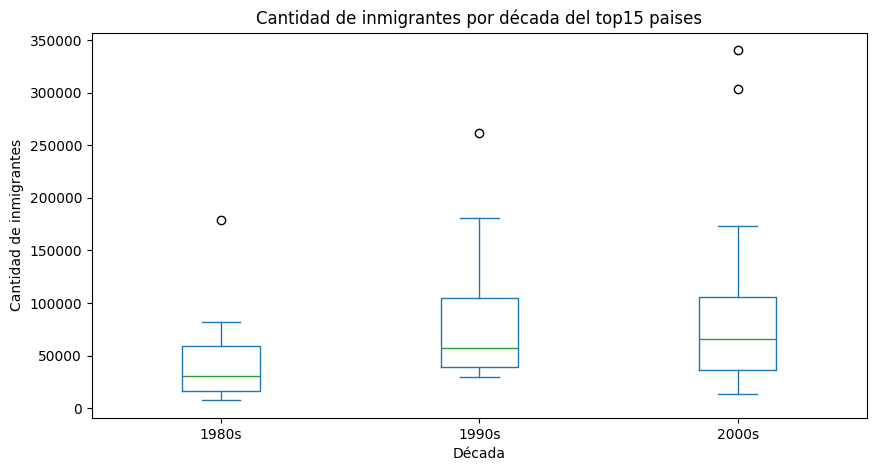

In [60]:
new_df.plot(kind="box", figsize=(10,5))

plt.title("Cantidad de inmigrantes por década del top15 paises")

plt.xlabel("Década")

plt.ylabel("Cantidad de inmigrantes")

**Outliers en Box plots**:
* Mayores que Q3 al menos 1.5 veces el range intercuartil (IQR)
* Menores que Q1 al menos 1.5 veces el rango intercuartil (IQR

Basado en ello se puede obtener los outliers

* IQR = Q3 - Q1 = 69,404
* Outiler > 105,505.5 + (1.5*69,404)
* Outlier > 209,611.5

In [61]:
new_df = new_df.reset_index()

new_df[new_df["2000s"] > 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


# **Scatter plots**
---

In [62]:
df_tot = pd.DataFrame(df[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ["year", "total"]

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


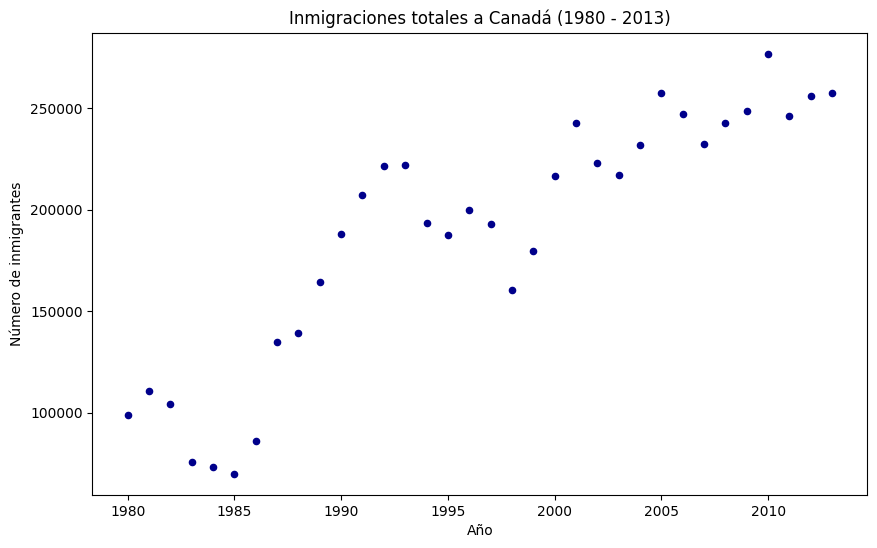

In [63]:
df_tot.plot(kind="scatter", x="year", y="total", figsize=(10, 6), color="darkblue")

plt.title("Inmigraciones totales a Canadá (1980 - 2013)")
plt.xlabel("Año")
plt.ylabel("Número de inmigrantes")

plt.show()

In [64]:
x = df_tot["year"]
y = df_tot["total"]

fit = np.polyfit(x, y, deg = 1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

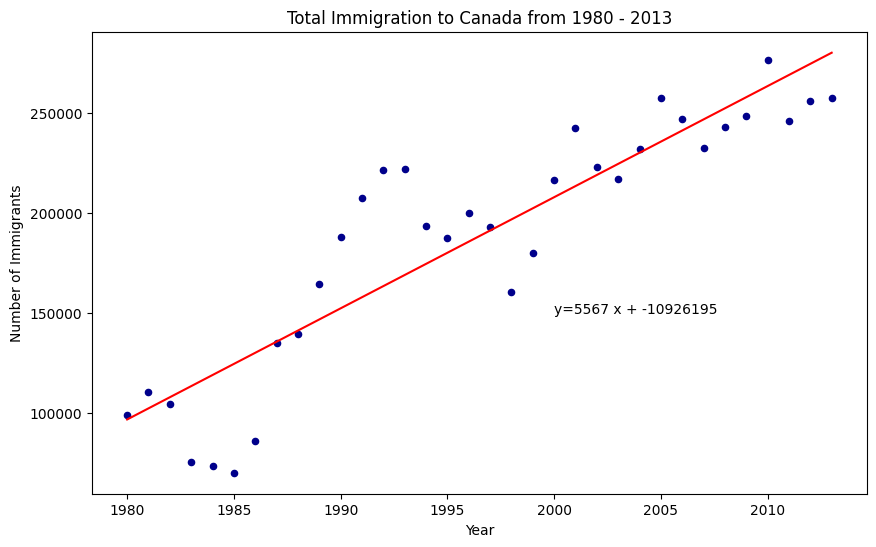

'No. Immigrants = 5567 * Year + -10926195'

In [65]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

In [73]:
df_countries = df.loc[["Denmark", "Norway", "Sweden"], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.columns = ["year", "total"]

df_total["year"] = df_total["year"].astype(int)

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


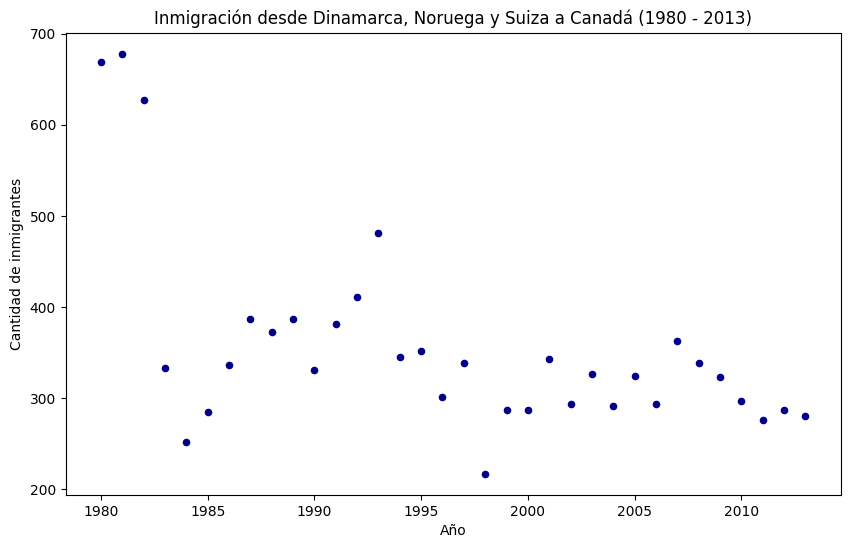

In [75]:
df_total.plot(kind="scatter", x="year", y="total", figsize=(10, 6), color="darkblue")

plt.title("Inmigración desde Dinamarca, Noruega y Suiza a Canadá (1980 - 2013)")
plt.xlabel("Año")
plt.ylabel("Cantidad de inmigrantes")

plt.show()

# **Bubble Plots**
---

In [76]:
df_t = df[years].transpose()

df_t.index = map(int, df_t.index)

df_t.index.name = "Year"

df_t.reset_index(inplace=True)

df_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [77]:
# normalize Brazil data
norm_brazil = (df_t['Brazil'] - df_t['Brazil'].min()) / (df_t['Brazil'].max() - df_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_t['Argentina'] - df_t['Argentina'].min()) / (df_t['Argentina'].max() - df_t['Argentina'].min())

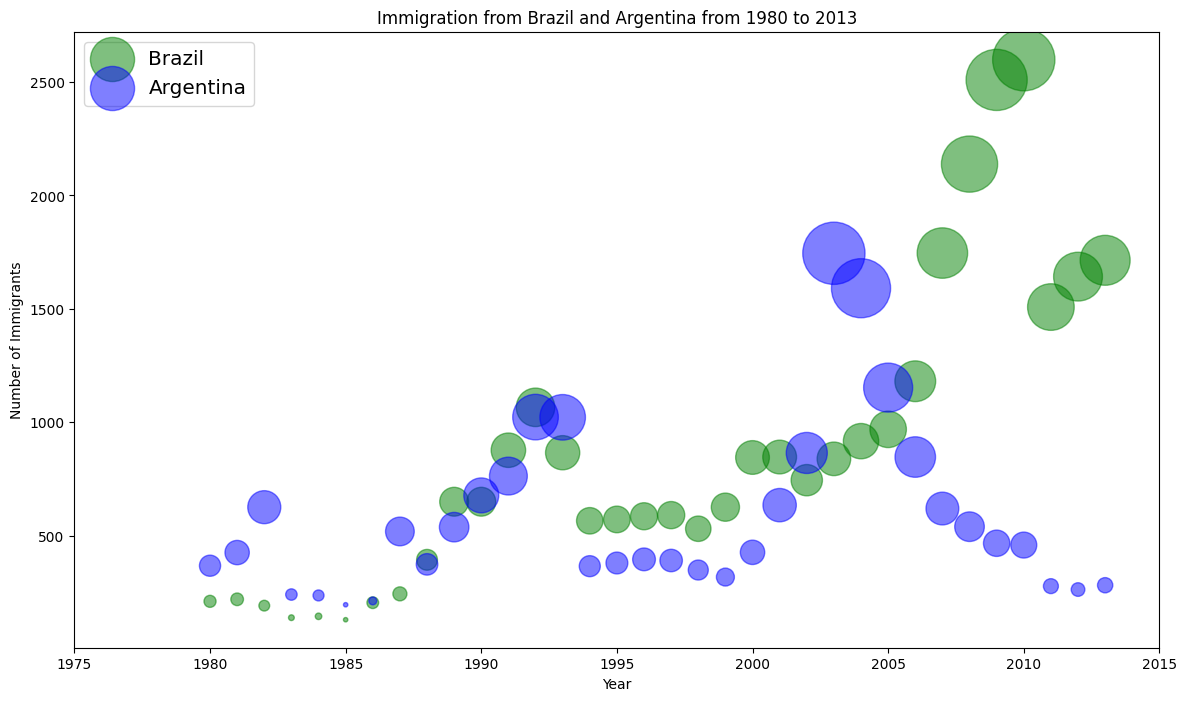

In [78]:
# Brazil
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [79]:
norm_china = (df_t["China"] - df_t["China"].min()) / (df_t["China"].max() - df_t["China"].min())

norm_india = (df_t["India"] - df_t["India"].min()) / (df_t["India"].max() - df_t["India"].min())

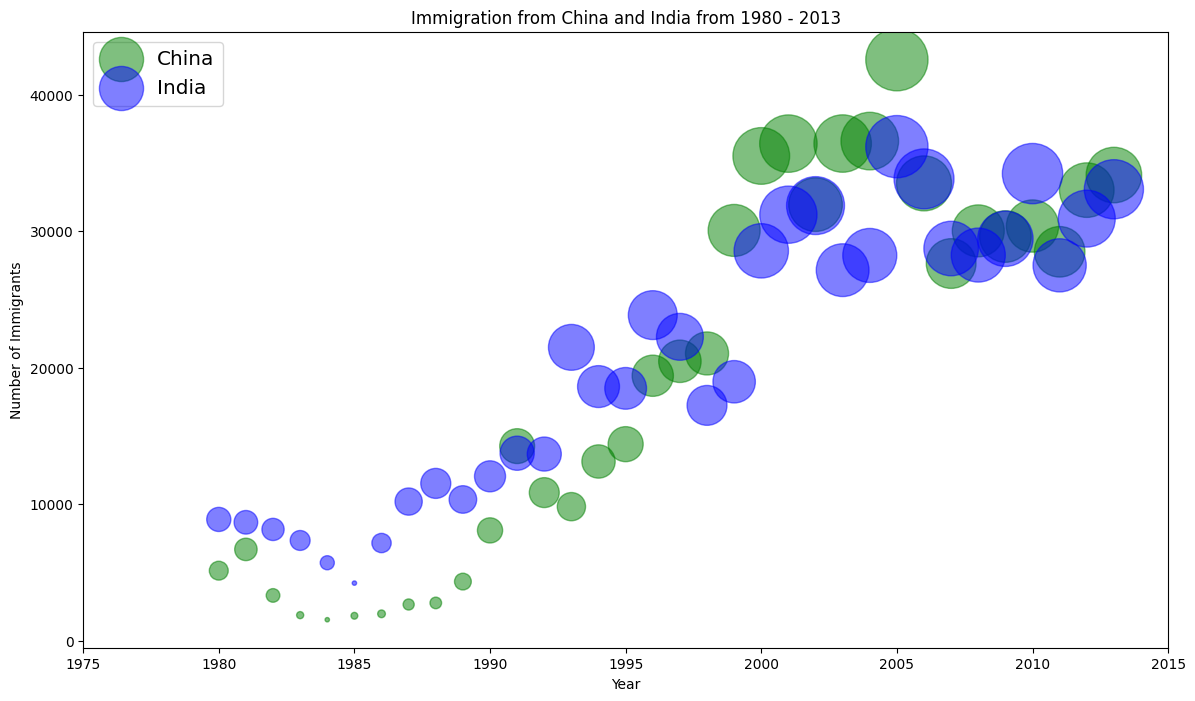

In [81]:
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')